<div style="text-align: center;">
  <h1><strong>Fast Food Marketing Campaign A/B Testing</strong></h1>
</div>

<div style="text-align: center;">
  <img src="https://cdn.i.haymarketmedia.asia/?n=campaign-asia%2fcontent%2ftop10fastfood_main_1200.jpg&h=570&w=855&q=100&v=20170226&c=1" alt="My centered image" width="600" height="500"/>
</div>

### **Context**

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting their new product. To determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

### **Objective**

As a Data Scientist, our objective is to analyze the data and help the fast-food chain decide which marketing strategy works the best. We will use A/B testing results and decide which marketing strategy works the best.

### **Data Dictionary**

- MarketID: unique identifier for market
- MarketSize: size of market area by sales
- LocationID: unique identifier for store location
- AgeOfStore: age of store in years
- Promotion: one of three promotions that were tested
- week: one of four weeks when the promotions were run
- SalesInThousands: sales amount for a specific LocationID, Promotion, and week

## **Importing Libraries and Reading Dataset**

In [4]:
# Importing necessary libraries for project - all libraries below are for numeric computations, dataframes, and data visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importing marketing dataset
data = pd.read_csv(r'C:\Users\Luis Alfredo\Documents\Data Science - Python\Datasets\WA_Marketing-Campaign.csv')

In [6]:
# Viewing the dataframe imported
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [21]:
# Looking at the dimensions of the dataset
data.shape

(548, 7)

In [22]:
# Checking data types and null values within the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


All columns are numeric data types except for market size. No missing values that would require replacement or removal.

In [139]:
# Quickly checking over statistics of the numeric datasets for a brief understanding of the data
data.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


quick into the the statistics of the numerical data.

In [7]:
# Observing the distribution of unique values across each column
for col in data.columns[:-1]:
    x = round((80 - len(str(col)))/2)
    print('-'*x + str(col).upper() + '-'*x)
    print(data[col].value_counts())

------------------------------------MARKETID------------------------------------
MarketID
3     88
10    80
5     60
6     60
7     60
1     52
8     48
9     40
4     36
2     24
Name: count, dtype: int64
-----------------------------------MARKETSIZE-----------------------------------
MarketSize
Medium    320
Large     168
Small      60
Name: count, dtype: int64
-----------------------------------LOCATIONID-----------------------------------
LocationID
1      4
615    4
609    4
610    4
611    4
      ..
222    4
221    4
220    4
219    4
920    4
Name: count, Length: 137, dtype: int64
-----------------------------------AGEOFSTORE-----------------------------------
AgeOfStore
1     80
4     44
5     44
7     40
8     40
6     36
3     32
9     28
10    24
12    24
19    20
13    20
2     20
11    16
14    12
24    12
22    12
15     8
23     8
18     8
28     4
25     4
27     4
17     4
20     4
Name: count, dtype: int64
------------------------------------PROMOTION----------------

We can observe above that more than half of the stores' market size is medium-sized. And the minority of stores have a small market size, and it is important to note the company is looking to market their campaign across all types of stores. We also observe that 80 stores have been open for a year, indicating growth of the business, but supporting the statement before of campaigning across all types of stores. Lastly, all locations have 4 stores and promotions have been very close to being equally distributed within the four weeks of promoting.

## **Exploratory Data Analysis**

### Univariate analysis

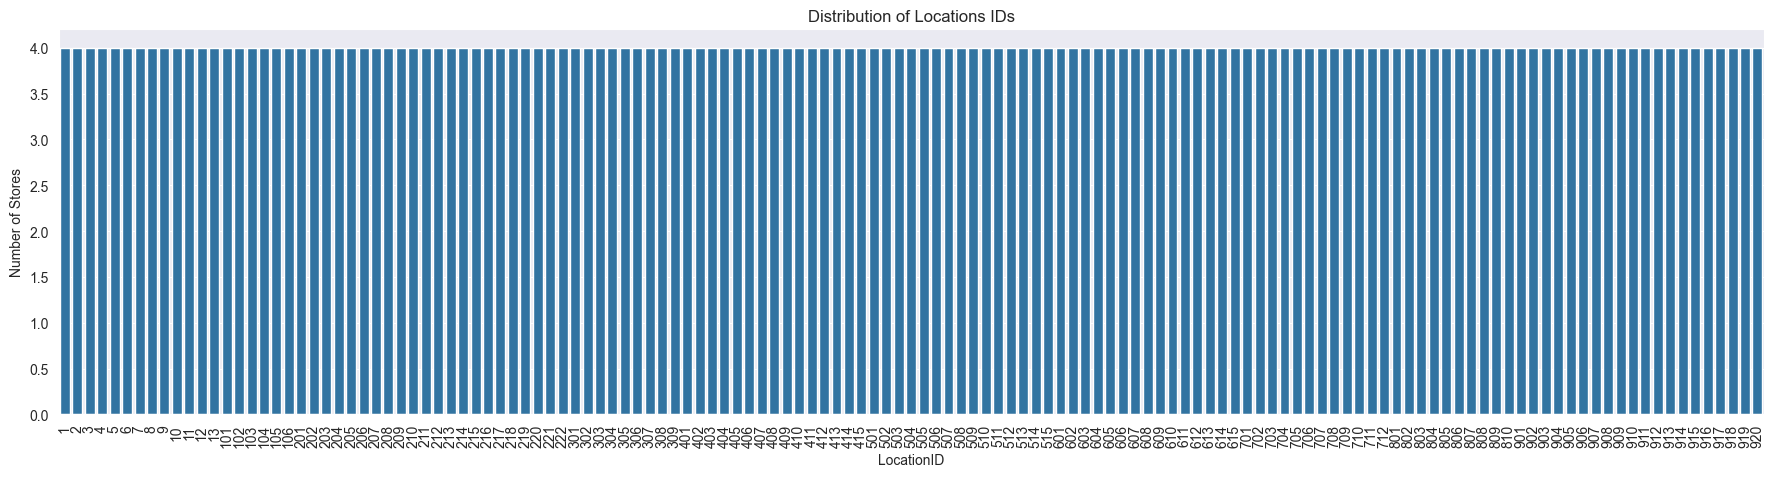

In [72]:
# Creating the layout of the figure for us to add a graph to
fig, axes = plt.subplots(figsize = (22,5))
sns.set_style('darkgrid')

# Creating dataframe for the distribution of LocationIDs to graph
loc = data.LocationID.value_counts().to_frame().reset_index()

# Creating bar plot as our graph to visualize the distribution
sns.barplot(x = loc['LocationID'], y = loc['count'])

axes.tick_params(axis='x', rotation=90)
plt.ylabel('Number of Stores')
plt.title('Distribution of Locations IDs')
plt.show()

As mentioned before, all locations have 4 stores and is uniformly distributed. This important as all location will be represented within the greater fast food chain for their campaigning goals.  

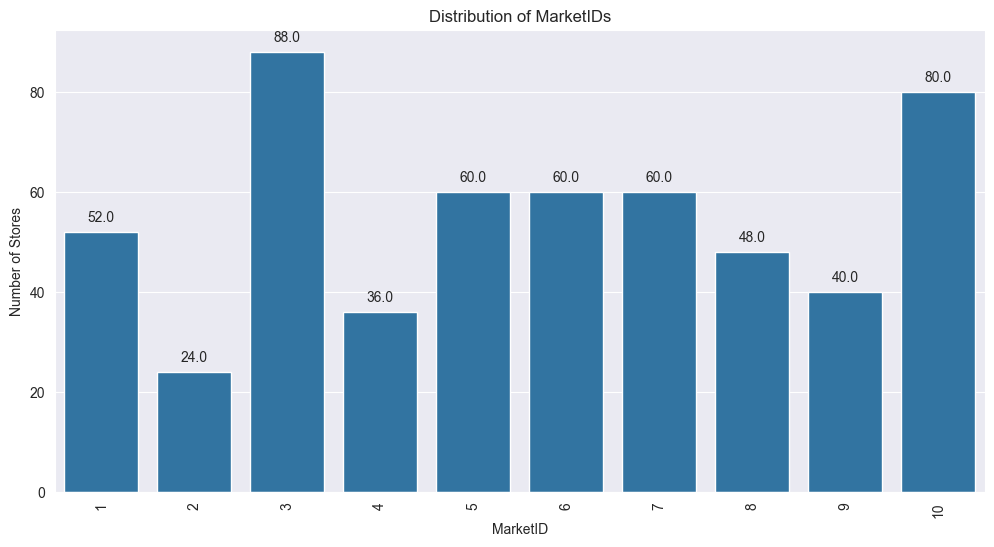

In [71]:
# Creating the layout of the figure for us to add a graph to
fig, axes = plt.subplots(figsize = (12,6))
sns.set_style('darkgrid')

# Creating dataframe for the distribution of MarketIDs to graph
mrktid = data.MarketID.value_counts().to_frame().reset_index()

# Creating bar plot as our graph to visualize the distribution
sns.barplot(x = mrktid['MarketID'], y = mrktid['count'])
axes.tick_params(axis='x', rotation=90)

# Adding labels above bars
for p in axes.patches:
    axes.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylabel('Number of Stores')
plt.title('Distribution of MarketIDs')
plt.show()

All markets have at least 40 stores except for MarketID 2. All different markets are not equally distributed.

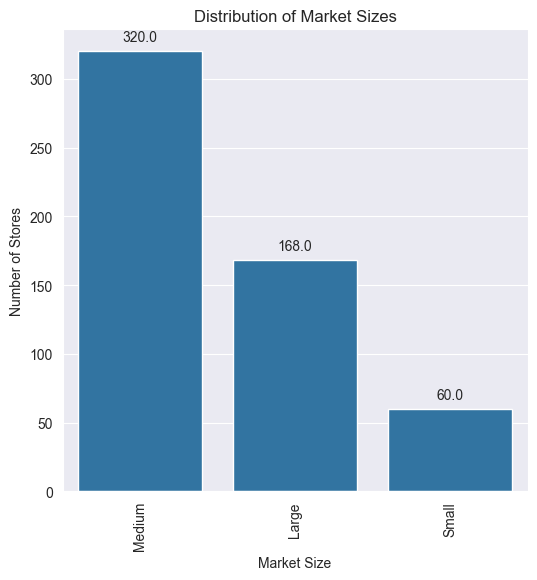

In [70]:
# Creating the layout of the figure for us to add a graph to
fig, axes = plt.subplots(figsize = (6,6))
sns.set_style('darkgrid')

# Creating dataframe for the distribution of market sizes to graph
mrktsz = data.MarketSize.value_counts().to_frame().reset_index()

# Creating bar plot as our graph to visualize the distribution
sns.barplot(x = mrktsz['MarketSize'], y = mrktsz['count'])
axes.tick_params(axis='x', rotation=90)

# Adding labels above bars
for p in axes.patches:
    axes.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Market Size')
plt.ylabel('Number of Stores')
plt.title('Distribution of Market Sizes')
plt.show()

As mentioned before, more than half of the stores have a medium-sized market. About a third of the stores have a large market size, and a small amount of stores have a small market size. It will be good to look at multivariate distributions across market size and/or statistically test across the market sizes. 

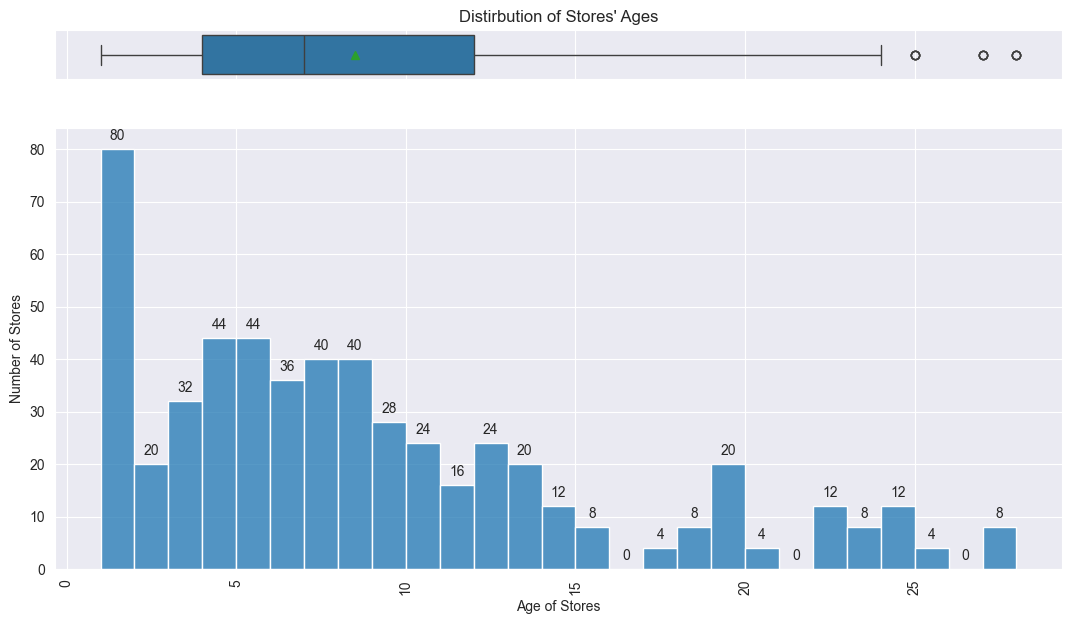

In [78]:
# Creating the layout of the figure for us to add two graphs to
fig, axes = plt.subplots(2, figsize = (13,7), gridspec_kw={'height_ratios': (.1, .9)}, sharex = True)
sns.set_style('darkgrid')

# Creating histogram and box plot as our graphs to visualize the distribution
sns.histplot(x = data['AgeOfStore'], ax = axes[1], bins = list(np.arange(1, 29)))
sns.boxplot(data = data, x = data['AgeOfStore'], ax = axes[0], showmeans = True)
axes[1].tick_params(axis='x', rotation=90)

# Adding labels above bars
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

axes[0].set_title("Distirbution of Stores' Ages")

axes[1].set_xlabel('Age of Stores')
axes[1].set_ylabel('Number of Stores')

plt.show()

Half of the stores' ages are between 4-13 and the other half range from 1-4 and 13-28. We can see the median is at 7 and the mean is 8.5, with most of the stores being less than 13 years. The distribution of ages is also skewed right with very few outliers that will not be removed from the dataset.

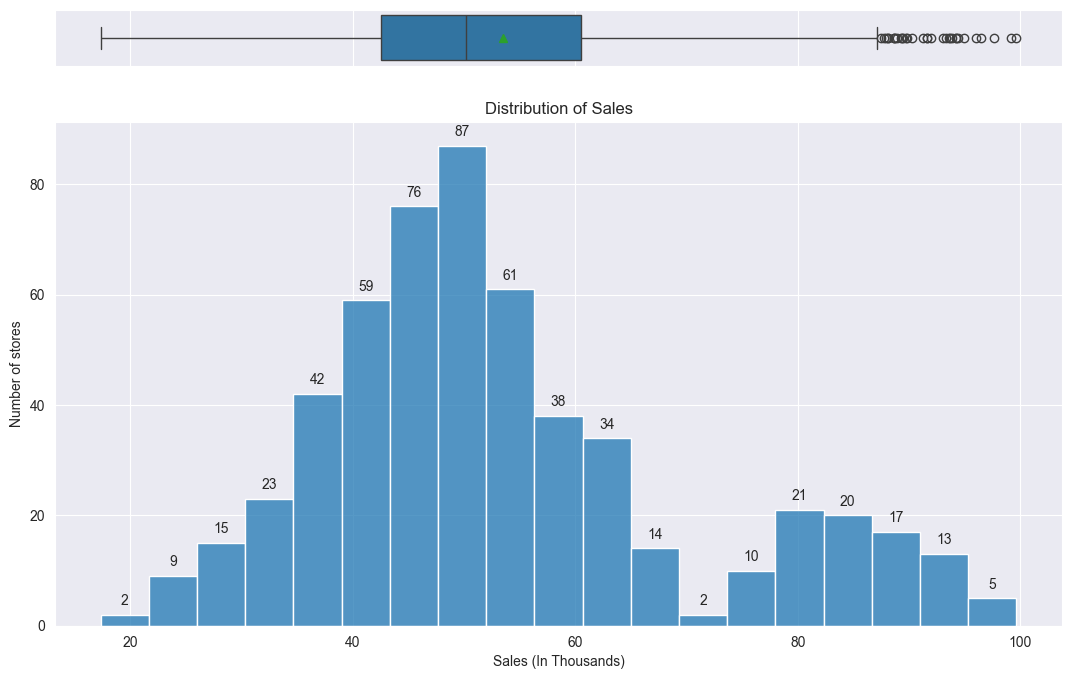

In [94]:
# Creating the layout of the figure for us to add a graph to
fig, axes = plt.subplots(2, figsize = (13,8), gridspec_kw={'height_ratios': (.1, .9)}, sharex = True)
sns.set_style('darkgrid')

# Creating bar plot as our graph to visualize the distribution of sales
sns.boxplot(data = data, x = 'SalesInThousands', showmeans = True, ax = axes[0])
sns.histplot(data = data, x = 'SalesInThousands', ax = axes[1])

# Adding labels above bars
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylabel('Number of stores')
plt.xlabel('Sales (In Thousands)')
plt.title('Distribution of Sales')
plt.show()

The distribution of sales is closer to a normal distribution with the mean being 53.5k. The median of the distribution is about 50k and there are a lot of outliers in the data, but we will not be removing the outliers as there is limited data. Important to keep the sales distribution in mind as we A/B test.

### Multivariate analysis

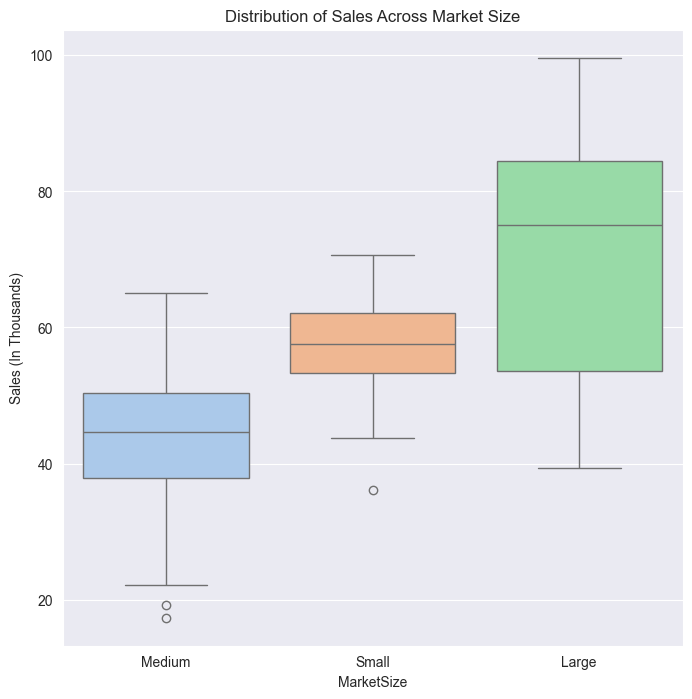

In [134]:
# Creating the layout of the figure for us to add a graph to
fig, axes = plt.subplots(figsize = (8,8))
sns.set_style('darkgrid')

# Creating box plot as our graph to visualize the distribution of sales across market size
sns.boxplot(data = data, x = 'MarketSize', hue = 'MarketSize', y = 'SalesInThousands', legend = False, palette = 'pastel')

plt.ylabel('Sales (In Thousands)')
plt.title('Distribution of Sales Across Market Size')
plt.show()

Looking at the distribution of sales across market sizes, we surprisingly see that medium-sized markets have less sales than small markets on average, even with more medium-sized markets being represented. Large markets have the largest sales on average and the largest range. It is going to be important to see how campaigning across the different market sizes will differ as they're sizes do not positively correlate to more sales. 

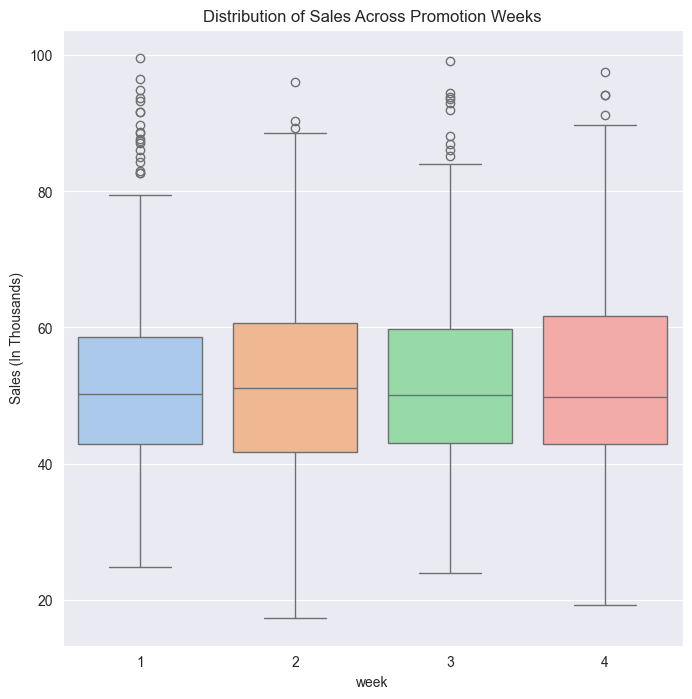

In [138]:
# Creating the layout of the figure for us to add a graph to
fig, axes = plt.subplots(figsize = (8,8))
sns.set_style('darkgrid')

# Creating box plot layover as our graph to visualize the distribution of sales across the weeks
sns.boxplot(data = data, x = 'week', hue = 'week', y = 'SalesInThousands', legend = False, palette = 'pastel')

plt.ylabel('Sales (In Thousands)')
plt.title('Distribution of Sales Across Promotion Weeks')
plt.show()

Across the 4 weeks of promoting, the median of sales did not fluctuate much at all. However, week 1 and 3 sales hold the largest sales, almost 100k. We can see that week 1 and 3 have a smaller interquartile range as more sales were closer to the median, leading to more outliers. Overall, with sales being similar across the weeks, we can assume that nothing out of the ordinary affected sale spikes within the weeks that the promotions were ongoing, but we have to investigate further to see if the promotion affected sales.

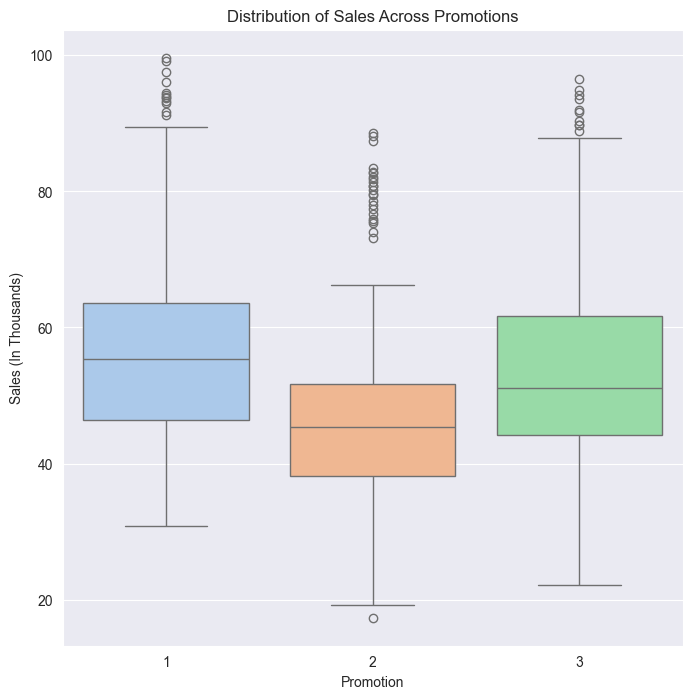

In [137]:
# Creating the layout of the figure for us to add a graph to
fig, axes = plt.subplots(figsize = (8,8))
sns.set_style('darkgrid')

# Creating box plot as our graph to visualize the distribution of sales across the weeks
sns.boxplot(data = data, x = 'Promotion', hue = 'Promotion', y = 'SalesInThousands', legend = False, palette = 'pastel')

plt.ylabel('Sales (In Thousands)')
plt.title('Distribution of Sales Across Promotions')
plt.show()

As mentioned before, promotions were equally distributed and the sales are fairly close, but we can see that promotion 2 had the least amount of sales by a small margin and promotion 1 had the greatest amount of sales by a small margin. Promotion 2 seems to have overall lower sales, but more outliers. However, when comparing promotion 1 and 3, the size of their interquartile range does not differ by much. In conclusion, further investigation must be done to tell whether this outcome is coincidental or statistically significant enough that there is a difference between the means of the three different marketing campaigns.

## **Hypothesis Testing**

We can see that there are differences between the means of the sales for each promotion. However, we want to test that the means are statistically significant and not by chance. We will create the following hypotheses for testing.

H0: μ1 = μ2 = μ3 = μ4; The means of all groups are equal.

H1: At least one of the means of the groups is different.

If the null hypothesis (H0) is rejected, then we can accept our alternate hypothesis (H1) that at least one of the means of the groups differs. We will use a statistical test to compare the means and test if there is a statistical significance.

### Data Preparation

In [16]:
# Separating promotions to perform ANOVA testing 
promo1 = data[data['Promotion'] == 1]['SalesInThousands']
promo2 = data[data['Promotion'] == 2]['SalesInThousands']
promo3 = data[data['Promotion'] == 3]['SalesInThousands']

### Assumption Checks

We want to make assumption checks to check for normality and homogeneity of variance of the sales across the promotions to help us determine what type of statistical test to run. We will use a Shapiro-Wilk test to check for normality and Levene test to check for homogeneity of variance. Depending on our results from these tests, we will determine what type of statistical test we will use as a significance test.

In [148]:
# Importing Sharpiro-Wilk test from scipy library 
from scipy.stats import shapiro

# Applying Shapiro test to check for normality of every promotion
pvalue1 = shapiro(promo1)[1]
pvalue2 = shapiro(promo2)[1]
pvalue3 = shapiro(promo3)[1]

print('Normality Testing for promotions')

print('Promotion 1 p-value: %.10f' % (pvalue1))
print('Promotion 2 p-value: %.10f' % (pvalue2))
print('Promotion 3 p-value: %.10f' % (pvalue3))

Normality Testing for promotions
Promotion 1 p-value: 0.0000000198
Promotion 2 p-value: 0.0000000055
Promotion 3 p-value: 0.0000000150


We can see that the p-value for all three tests are below 0.05, therefore indicating that the distribution of the sales of each promotion is not normally distributed. 

In [18]:
# Importing Levene test from scipy library 
from scipy.stats import levene

# Applying Levene test to check homogeneity of variance across promotions
test_stat, pvalue = levene(promo1, promo2, promo3)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 1.2697, p-value = 0.2818


We can see that the p-value is 0.28 and the F-statistic is 1.27, therefore indicating that the variances of the sales for the promotions do not differ. 

### Determining the Statistical Test

From the Shapiro-Wilk test we determined the sales of each promotion are not normally distributed and the sales of the promotion do not differ in variance. Since we are comparing three independent groups, we will have to conduct a non-parametric test for multiple independent samples. The conditions for a Kruskal-Wallis test have been met, so we will use the Kruskal-Wallis test to test for statistical significance across the medians to accept or reject our null hypothesis. 

### Kruskal-Wallis Test

In [146]:
# Importing Kruskal-Wallis test from scipy library 
from scipy.stats import kruskal

# Applying Kruskal-Wallis test to test for statistical significance
test_stat, pvalue = kruskal(promo1, promo2, promo3)

print('Test Stat = %.4f, p-value = %.15f' % (test_stat, pvalue))

Test Stat = 53.2948, p-value = 0.000000000002674


We can see that the p-value is less than 0.05 and F-statistic is high, therefore we reject the null hypothesis and statistically prove that there is a difference between the medians.

### Dunn's Test

Lastly, to investigate a bit further on which specific sales median of each promotion differ comparitively, we will apply a Dunn's test where pairwaise comparisons are made between each independent group.

In [20]:
# Importing Dunn's test from scipy library 
from scikit_posthocs import posthoc_dunn

# Applying Dunn's test to every promotion
dunn_result = posthoc_dunn([promo1, promo2, promo3], p_adjust='bonferroni')

dunn_result

,1,2,3
1,1.000000e+00,6.461842e-12,1.458660e-01
2,6.461842e-12,1.000000e+00,7.083069e-07
3,1.458660e-01,7.083069e-07,1.000000e+00


We can see that the p-values of promotions 1 and 2 and promotions 1 and 3 are both lower than 0.05 in their pairwise comparison, therefore rejecting the null hypothesis that the medians are equal and concluding that both the medians of sales of promotions 1 and 3 differ from that of promotion 2. Lastly, promotion 1 and 3 have a p-value greater than 0.05 in their paired comparison and therefore do not reject the null hypothesis and conclude that there is no difference between the medians.

## **Conclusion**

From conducting our Kruskal-Wallis test, we were able to conclude that there was a difference between the median of sales for each promotion and from Dunn's tests we concluded that both the median of sales for promotion 1 and 3 differ from promotion 2. We concluded as well that there is not enough statistical evidence to conclude that there is a difference in the median of sales for promotions 1 and 3. When also visually looking at the distribution of sales for the promotions, we saw that the median of sales for promotion 1 and 3 were close, with promotion 1 having a slightly larger median and promotion 2 having the smallest median. Therefore, after concluding our entire investigation, we recommend the fast food chain to use promotions 1 and 3 across their business to market effectively. We would also recommend the company to test across different market sizes, as the medians differed there in sales, and the distribution of store market sizes picked differed in this campaign.  